In [1]:
from sklearn.impute import SimpleImputer

def clean_data(data):
    """
    Clean the dataset by handling missing values and scaling the data.
    :param data: Raw dataset.
    :return: Cleaned dataset.
    """
    # Step 2.1: Handle missing values (if any) using mean imputation
    # First, drop columns where all values are NaN
    data = data.dropna(axis=1, how='all')
    
    # Then, use SimpleImputer to impute remaining NaN values in the dataset
    imputer = SimpleImputer(strategy='mean')
    data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    print("Missing values handled using mean imputation.")
    
    # Step 2.2: Standardize the data (Z-score normalization)
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)
    print("Data standardized using StandardScaler.")
    
    return data_scaled


Data loaded from features_raw.csv. Shape: (8064, 33)
Missing values handled using mean imputation.
Data standardized using StandardScaler.
PCA completed. Number of components: 6


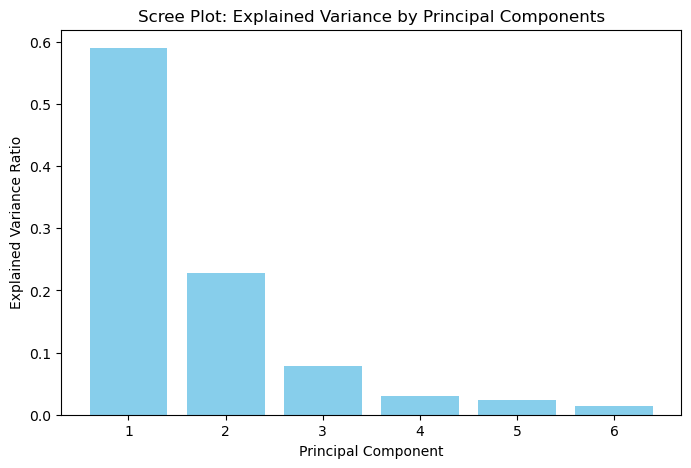

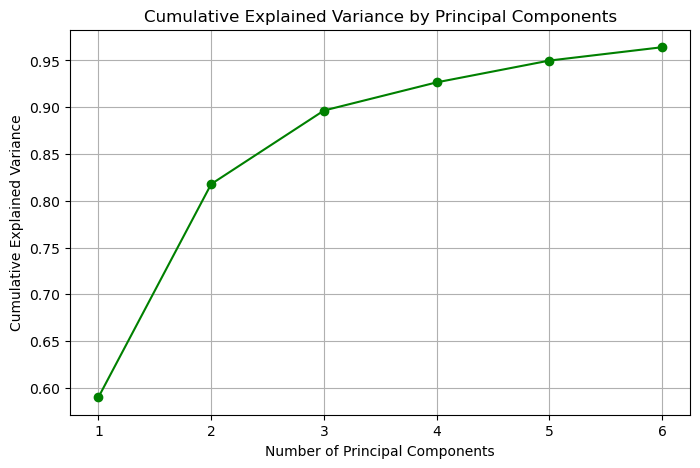

  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.590040                       0.590040
1                 PC2                  0.227808                       0.817847
2                 PC3                  0.078588                       0.896435
3                 PC4                  0.030111                       0.926546
4                 PC5                  0.023292                       0.949838
5                 PC6                  0.014267                       0.964105


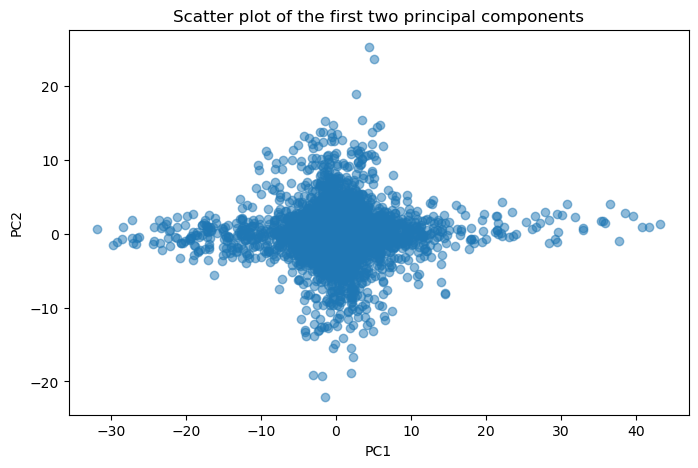

PCA results saved to pca_results.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

file_path = 'features_raw.csv'

def load_data(file_path_1):
    """
    Load the dataset from the specified CSV file.
    :param file_path: Path to the CSV file.
    :return: DataFrame containing the dataset.
    """
    data = pd.read_csv(file_path)
    print(f"Data loaded from {file_path}. Shape: {data.shape}")
    return data

def clean_data(data):
    """
    Clean the dataset by handling missing values and scaling the data.
    :param data: Raw dataset.
    :return: Cleaned dataset.
    """
    # Step 2.1: Handle missing values (if any) using mean imputation
    # Drop columns with all NaN values
    data = data.dropna(axis=1, how='all')
    
    # Impute remaining NaN values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    print("Missing values handled using mean imputation.")
    
    # Step 2.2: Standardize the data (Z-score normalization)
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)
    print("Data standardized using StandardScaler.")
    
    return data_scaled

def perform_pca(data, variance_threshold=0.95):
    """
    Perform PCA on the cleaned and standardized data.
    :param data: Cleaned and standardized dataset.
    :param variance_threshold: The proportion of variance to retain.
    :return: PCA model, transformed data, explained variance.
    """
    pca = PCA(n_components=variance_threshold)
    pca.fit(data)
    pca_data = pca.transform(data)
    explained_variance = pca.explained_variance_ratio_
    
    print(f"PCA completed. Number of components: {pca.n_components_}")
    return pca, pca_data, explained_variance

def plot_explained_variance(explained_variance):
    """
    Plot the explained variance ratio and cumulative variance ratio, and display a table.
    :param explained_variance: The explained variance ratio of each principal component.
    """
    # Scree plot for explained variance of each principal component
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot: Explained Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.show()
    
    # Cumulative explained variance plot
    cumulative_variance = np.cumsum(explained_variance)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', color='green')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.grid(True)
    plt.show()

    # Create a DataFrame to display the explained variance and cumulative variance
    explained_variance_df = pd.DataFrame({
        'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
        'Explained Variance Ratio': explained_variance,
        'Cumulative Explained Variance': cumulative_variance
    })
    
    # Display the table
    print(explained_variance_df)
    return explained_variance_df

def plot_pca_components(pca_data, n_components=2):
    """
    Visualize the first few principal components.
    :param pca_data: Transformed PCA data.
    :param n_components: Number of principal components to plot.
    """
    if pca_data.shape[1] >= n_components:
        plt.figure(figsize=(8, 5))
        plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
        plt.xlabel(f'PC1')
        plt.ylabel(f'PC2')
        plt.title(f'Scatter plot of the first two principal components')
        plt.show()
    else:
        print(f"Not enough components to plot. Only {pca_data.shape[1]} components available.")



def main():
    file_path = "features_raw.csv"
    data = load_data(file_path)
    data_scaled = clean_data(data)
    pca, pca_data, explained_variance = perform_pca(data_scaled)
    plot_explained_variance(explained_variance)
    plot_pca_components(pca_data, n_components=2)
    
    pca_results = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
    pca_results.to_csv("pca_results.csv", index=False)
    print("PCA results saved to pca_results.csv")

if __name__ == "__main__":
    main()
